# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [13]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = '/home/xq/dl-car/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/train.p'
testing_file = '/home/xq/dl-car/CarND-Traffic-Sign-Classifier-Project/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
print(X_train.shape)
print(y_train.shape)
X_test, y_test = test['features'], test['labels']
print(X_test.shape)
print(y_test.shape)

(39209, 32, 32, 3)
(39209,)
(12630, 32, 32, 3)
(12630,)


# visualization on the dataset

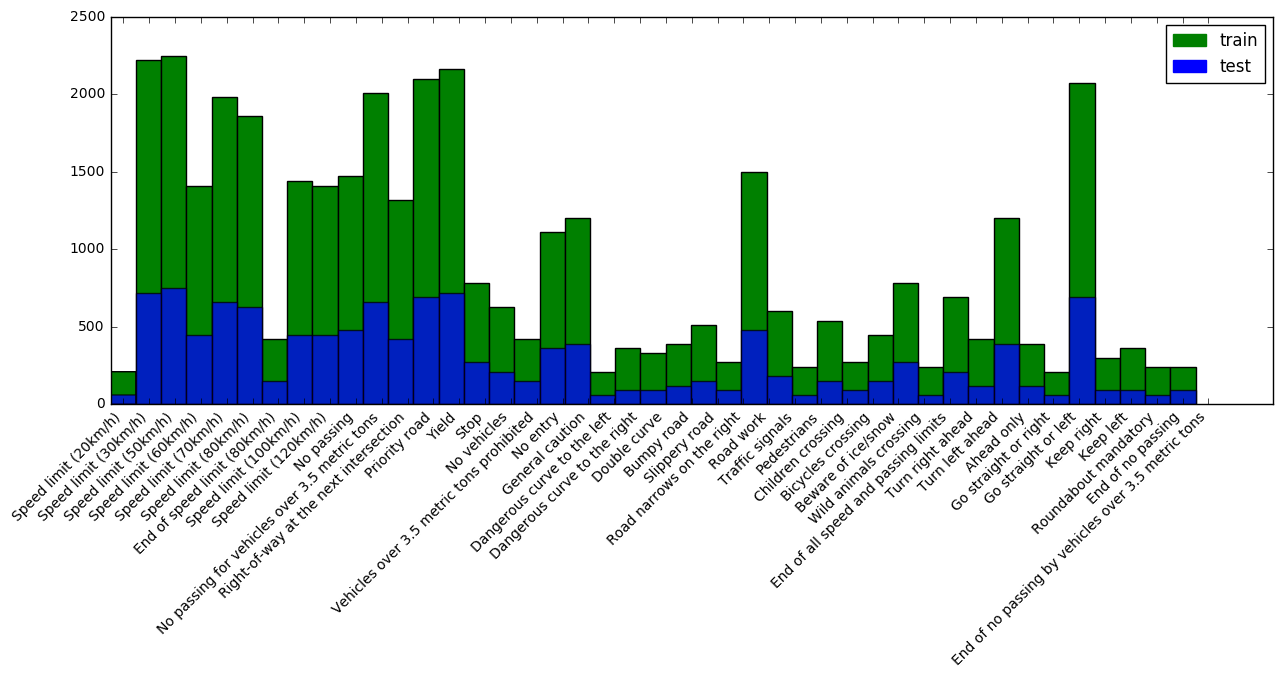

In [158]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import csv  #csv operation
import pandas as pd

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.hist(y_train, bins=43, facecolor='green')  
ax.hist(y_test, bins=43, facecolor='blue', alpha=0.75)  

train_patch = mpatches.Patch(color='green', label='train')
test_patch = mpatches.Patch(color='blue', label='test')

#read vsc

with open('signnames.csv','r') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        sKtag =  tuple(line[1])
        #rint((Ktag[:1][1:2]))
        #plt.xticks(np.arange(0.5,43.5,1.0),line[1])
        
df = pd.read_csv('signnames.csv')

#print(type(df))
#print((df))
Ktags = (list(df.SignName))  #hseeming can't use ['tags']  to get dada

#csvfile.close() --->not need

plt.xticks(np.arange(0.5,43.5,1.0),Ktags,ha='right',rotation=45)
plt.legend(handles=[train_patch,test_patch])

plt.show()

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [499]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = 39209

# TODO: Number of testing examples.
n_test = 12630

# TODO: What's the shape of an traffic sign image?
image_shape = [32,32,3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = 43

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = [32, 32, 3]
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

(32, 32, 3)
0


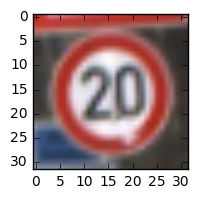

In [500]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import random
import numpy as np
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

index = random.randint(0, len(X_train))
#image = X_train[index].squeeze()
print(X_train[index].shape)
index = 18
image = X_train[index].squeeze()
plt.figure(figsize=(2,2))
plt.imshow(image)
print(y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [161]:
import hashlib
import os
import pickle
from urllib.request import urlretrieve

import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.utils import resample
from tqdm import tqdm
from zipfile import ZipFile

print('All modules imported.')

All modules imported.


In [502]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

#mport cv2
#convert to gray image
#_train, y_traingray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

def normalize_input_maxmin(image_data):
    """
    Normalize the image data with Min-Max scaling to a range of [0.1, 0.9]
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    # TODO: Implement Min-Max scaling for grayscale image data
    Xmax = 255 #image_data.max()
    Xmin = 0  #image_data.min()
    a = 0.1
    b = 0.9
    return a + (image_data - Xmin) *(b - a) / (Xmax - Xmin)

def normalize_input_zerosmean(image_data):
    return (image_data - 128) / 128

#X_train = normalize_input(X_train)
#test_features = normalize_input(X_test)
X_train = normalize_input_maxmin(X_train)
test_features = normalize_input_maxmin(X_test)
#X_train = normalize_input_zerosmean(X_train)
#test_features = normalize_input_zerosmean(X_test)
#translations, scalings and rotations


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**
I used Min-Max scaling or coordinate centralized to normalizing the features for training and test data. Normalization would be helpful to make training fast. I also used function 'shuffle()' to decrease influence of the data-order in trainning of network. Because of the network limitation,I can't run this code in tensorboard, I'm so sorry.

In [503]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
# Get randomized datasets for training and validation


# Get randomized datasets for training and validation
train_features, valid_features, train_labels, valid_labels = train_test_split(
    X_train,
    y_train,
    test_size=0.05,
    random_state=832289)
print(train_features.shape)
print(train_labels.shape)
print(y_train.shape)
print(valid_features.shape)
print(valid_labels.shape)
print('Training features and labels randomized and split.')

(37248, 32, 32, 3)
(37248,)
(39209,)
(1961, 32, 32, 3)
(1961,)
Training features and labels randomized and split.


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** First,I import function 'train_test_split()' from sklearn.model_selection, then use this function to  return the  validation data by extract samples from  'train_feature' in a ratio randomly. The new dataset add the generated dataset is the original dataset.

# Setup TensorFlow

The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [504]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 15
BATCH_SIZE = 128

Use a similarity architecture with LeNet

# Input


In [505]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_w = tf.Variable(tf.truncated_normal(shape=(5,5,3,6),mean = mu,stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1 = tf.nn.conv2d(x,conv1_w,strides=[1,1,1,1],padding='VALID') + conv1_b

    # TODO: Activation.
    conv1 = tf.nn.relu(conv1)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    conv2_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16),mean = mu,stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2 = tf.nn.conv2d(conv1,conv2_w,strides=[1,1,1,1],padding='VALID') + conv2_b
    # TODO: Activation.
    conv2 = tf.nn.relu(conv2)
    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2,ksize=[1,2,2,1],strides=[1,2,2,1],padding='VALID')
    # TODO: Flatten. Input = 5x5x16. Output = 400.
    fc0 = flatten(conv2)
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_w = tf.Variable(tf.truncated_normal(shape=(400,120),mean = mu,stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1 = tf.matmul(fc0,fc1_w) + fc1_b
    # TODO: Activation.
    fc1 = tf.nn.relu(fc1)
    
    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_w = tf.Variable(tf.truncated_normal(shape=(120,84),mean = mu,stddev = sigma))
    fc2_b = tf.Variable(tf.zeros(84))
    fc2 = tf.matmul(fc1,fc2_w) + fc2_b
    # TODO: Activation.
    fc2 = tf.nn.relu(fc2)
    # TODO: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_w = tf.Variable(tf.truncated_normal(shape=(84,43),mean = mu,stddev = sigma))
    fc3_b = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2,fc3_w) + fc3_b
    return logits

## Features and Labels


`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

In [506]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.


In [507]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

In [508]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    print(total_accuracy)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. C = 3
Architecture

Layer 1: Convolutional. The output shape should be 28x28x6.

Activation. Your choice of activation function.

Pooling. The output shape should be 14x14x6.

Layer 2: Convolutional. The output shape should be 10x10x16.

Activation. Your choice of activation function.

Pooling. The output shape should be 5x5x16.

Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten, which is already imported for you.

Layer 3: Fully Connected. This should have 120 outputs.

Activation. Your choice of activation function.

Layer 4: Fully Connected. This should have 84 outputs.

Activation. Your choice of activation function.

Layer 5: Fully Connected (Logits). This should have 43 outputs.
Output

Return the result of the 2nd fully connected layer.

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.


In [509]:
### Train your model here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            #print(batch_x.shape)
            #print(batch_y.shape)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
           
        validation_accuracy = evaluate(valid_features, valid_labels)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

0
EPOCH 1 ...
Validation Accuracy = 0.729

0
EPOCH 2 ...
Validation Accuracy = 0.879

0
EPOCH 3 ...
Validation Accuracy = 0.924

0
EPOCH 4 ...
Validation Accuracy = 0.925

0
EPOCH 5 ...
Validation Accuracy = 0.946

0
EPOCH 6 ...
Validation Accuracy = 0.966

0
EPOCH 7 ...
Validation Accuracy = 0.968

0
EPOCH 8 ...
Validation Accuracy = 0.975

0
EPOCH 9 ...
Validation Accuracy = 0.980

0
EPOCH 10 ...
Validation Accuracy = 0.984

0
EPOCH 11 ...
Validation Accuracy = 0.982

0
EPOCH 12 ...
Validation Accuracy = 0.978

0
EPOCH 13 ...
Validation Accuracy = 0.990

0
EPOCH 14 ...
Validation Accuracy = 0.992

0
EPOCH 15 ...
Validation Accuracy = 0.992

Model saved


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** I use function 'tf.train.AdamOptimizer(learning_rate = rate)' as optimizer, and Create a training pipeline  'optimizer.minimize(loss_operation)'.I set batch size = 128, epochs = 15, learning_rate = 0.001. I also tried the learning_rate = 0.01, but I find this rate cause a bigger oscillating, so I abandoned this choise.  

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** 
I find this problem is simailar with LeNet which learned befor,so I try to use the architure of LeNet to solve this problem. In 'CarND-LeNet-Lab', there are 10 charters need to be classified, and in this problem, there are 43 traffic signs, so the network should have 43 outputs. Beacuse the input image has 3 color channels, so the shape of wights of first convolution layer should be adjusted.   

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [190]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
## umpress image
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from PIL import ImageEnhance


def uncompress_features_labels(file):
    """
    Uncompress features and labels from a zip file
    :param file: The zip file to extract the data from
    """
    features = []
    labels = []

    with ZipFile(file) as zipf:
        # Progress Bar
        filenames_pbar = tqdm(zipf.namelist(), unit='files')
        
        # Get features and labels from all files
        for filename in filenames_pbar:
            # Check if the file is a directory
            if not filename.endswith('/'):
                with zipf.open(filename) as image_file:
                    #image1 = Image.open(image_file)
                    #img_enhance_Brightness.save("Brightness_%.2f.jpg" %factor) 
                    #image.load()
                    image = mpimg.imread(image_file)
                    
                    # Load image data as 1 dimensional array
                    # We're using float32 to save on memory space
                    feature = np.array(image, dtype=np.float32)#.flatten()

                # Get the the letter from the filename.  This is the letter of the image.
                label = os.path.split(filename)[1].split('.')[0]
                features.append(feature)
                labels.append(label)
    return np.array(features), np.array(labels)

# Get the features and labels from the zip files
test_features, test_labels = uncompress_features_labels('image2.zip')






  0%|          | 0/7 [00:00<?, ?files/s]


100%|██████████| 7/7 [00:00<00:00, 2462.48files/s]

## Visualize Data

View a sample from the dataset.

15
17
26
28
3
33
9


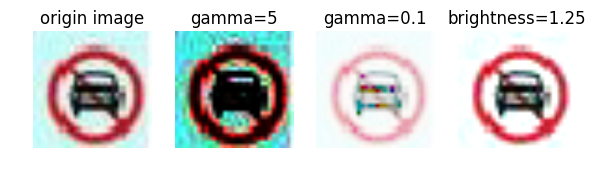

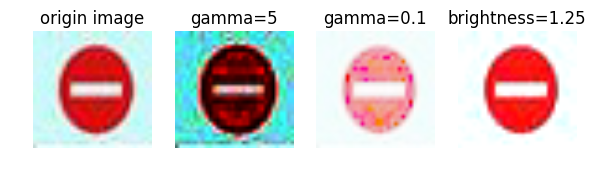

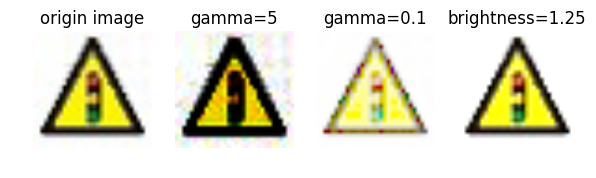

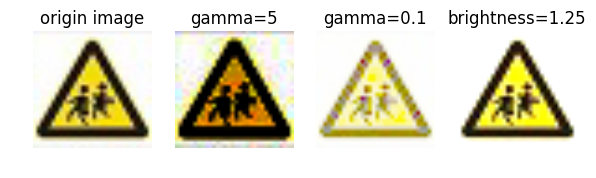

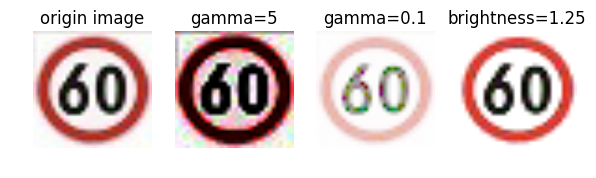

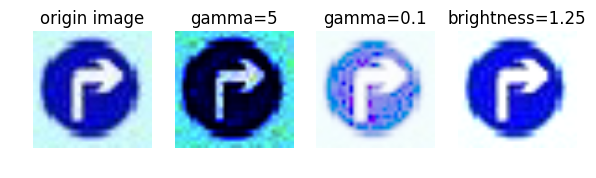

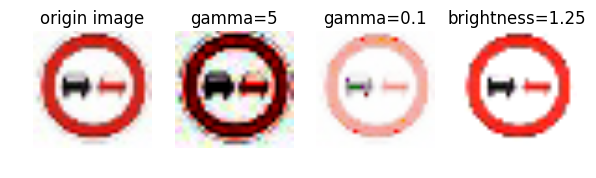

In [206]:
# Adjust brightness and contrast of new image
import random
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from PIL import Image
from PIL import ImageEnhance
%matplotlib inline

factor = 5./4  # Adjust brightness

for index in range(len(test_features)):
    image = test_features[index]
    gam1= exposure.adjust_gamma(image, 5)   #调暗
    gam2= exposure.adjust_gamma(image, 0.2)  #调亮
     
    print(test_labels[index])
    img = Image.fromarray(np.uint8(image*255)) #transfer
    img_Brightness = ImageEnhance.Brightness(img).enhance(factor)
    img_Bright_array = np.array(img_Brightness)
    #img.show()
        
    plt.figure(figsize=(7,7))
    plt.subplot(141)
    plt.title('origin image')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(142)
    plt.title('gamma=5')
    plt.imshow(gam1)
    plt.axis('off')
    
    plt.subplot(143)
    plt.title('gamma=0.1')
    plt.imshow(gam2)
    plt.axis('off')
    
    plt.subplot(144)
    plt.title('brightness=1.25')
    plt.imshow(img_Bright_array)
    plt.axis('off')
    

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I chosed 6 local traffic signs images from internet, and provide them here.Then, I adjusted contrast and brightness of these new images and showed above. From these images, I think lower gamma and bigger brightness will be helpful to make classification, because which means the image is more distinct and detail of the image is more clear. Especially  adjusting the brightness will improve  definition of the image and reserve details. on the contrary, lower contrast and brightness Seems to will make classification more difficult.

42
17
26
29
2
33
9


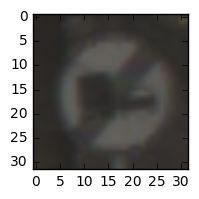

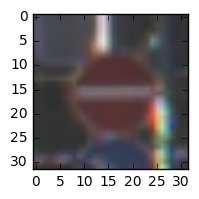

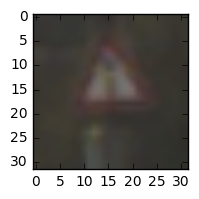

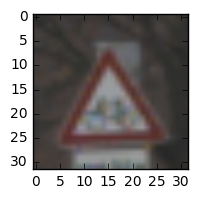

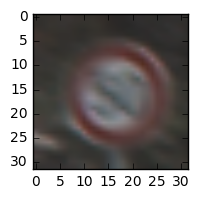

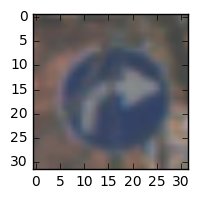

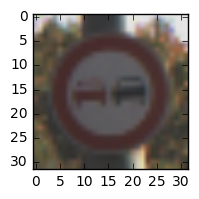

In [512]:
### Run the predictions here.
### Feel free to use as many code cells as needed.
prediction = tf.nn.softmax(logits)

def  find_image(subscpit):
    for index in range(len(y_train)):
        if(subscpit == y_train[index]):
            break
    image = X_train[index].squeeze()
    plt.figure(figsize=(2,2))
    plt.imshow(image)
        
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_prediction = sess.run(prediction, feed_dict={x: test_features})

    for n in range(len(test_features)):
        subscript = np.amax((test_prediction[n].nonzero()[0]))
        print(subscript)
        find_image(subscript)


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** I find my classifier makes obvious mistake when recognize traffic signs for the first time when I set epochs = 10, so I change it to 15. Now the accurate is varying between 50%~80%.

In [513]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_prediction = sess.run(prediction, feed_dict={x: test_features})
    #print((test_prediction))
    print(sess.run(tf.nn.top_k(test_prediction, k=5)))
    

TopKV2(values=array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.]], dtype=float32), indices=array([[42,  0,  1,  2,  3],
       [17,  0,  1,  2,  3],
       [26,  0,  1,  2,  3],
       [29,  0,  1,  2,  3],
       [ 2,  0,  1,  3,  4],
       [33,  0,  1,  2,  3],
       [ 9,  0,  1,  2,  3]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:** I find some uncertain of the predictions,  but the prediction  probability of the orther one in the top_k is much lower than the maxium one, and the result is often incorrect,too.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.